Importar Librerias 

In [1]:
import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones

# librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree 


In [2]:
Datos = pd.read_csv('Titanic-Dataset.csv')

In [3]:
Datos.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
Datos.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


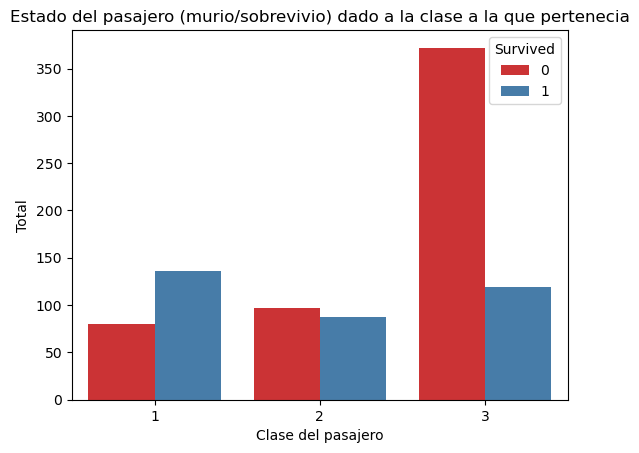

In [38]:
Datos.groupby(['Pclass', 'Survived'])['Survived'].count()
ax=sns.countplot(x='Pclass', hue='Survived', palette='Set1', data=Datos)
ax.set(title='Estado del pasajero (murio/sobrevivio) dado a la clase a la que pertenecia', 
       xlabel='Clase del pasajero', ylabel='Total')
plt.show()

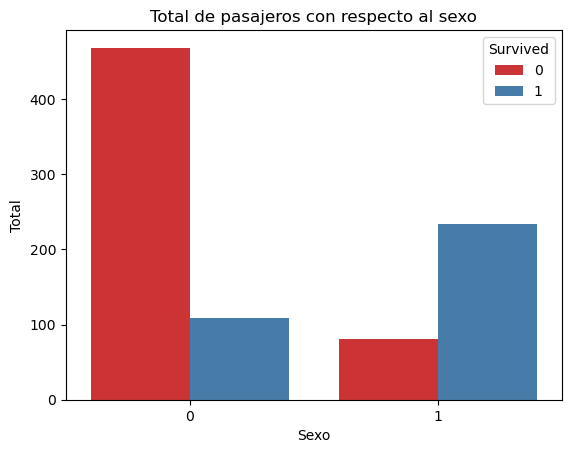

In [39]:
ax=sns.countplot(x='Sex', hue='Survived', palette='Set1', data=Datos)
ax.set(title='Total de pasajeros con respecto al sexo', 
       xlabel='Sexo', ylabel='Total')
plt.show()

In [6]:
# Rellenar los datos faltantes 

Datos['Age'] = Datos['Age'].fillna(Datos['Age'].median())
Datos['Embarked'] = Datos['Embarked'].fillna('S')

In [7]:
Datos.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,891.000000,891.000000,891.000000,891,891.000000,204,891
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,646
mean,446.000000,0.383838,2.308642,NaN,NaN,29.361582,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,13.019697,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,22.000000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


<Axes: xlabel='Survived,Sex'>

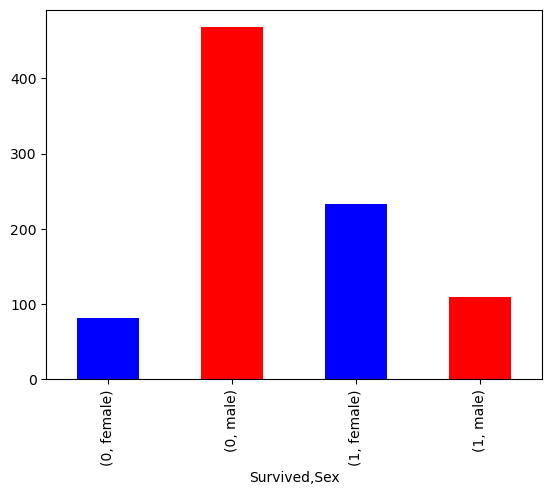

In [8]:
Datos[['Survived','Sex']].value_counts(sort=False).plot(kind='bar',color=['b','r'])

In [9]:
# convertir estas columnas de tipo object a int

# map para label encoding
Datos['Sex'] = Datos['Sex'].map({'female': 1, 'male': 0}).astype(int)

<Axes: xlabel='Survived,SibSp'>

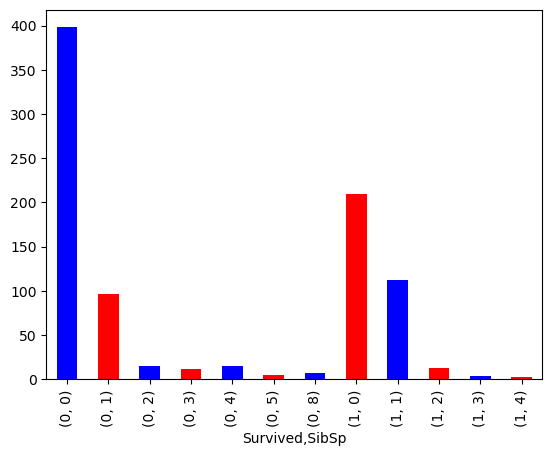

In [10]:
Datos[['Survived','SibSp']].value_counts(sort=False).plot(kind='bar',color=['b','r'])

<Axes: xlabel='Survived,Parch'>

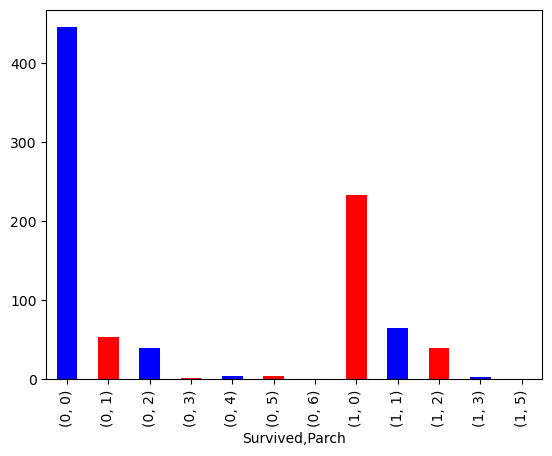

In [11]:
Datos[['Survived','Parch']].value_counts(sort=False).plot(kind='bar',color=['b','r'])

In [13]:
# Ahora definimos cuales variables no se van a utilizar para entrenar el modelo

train_predictors = Datos.drop(['PassengerId','Age','Survived','Name','Ticket','Cabin'],axis=1) 
train_predictors.head(5)

,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,3,0,1,0,7.2500,S
1,1,1,1,0,71.2833,C
2,3,1,0,0,7.9250,S
3,1,1,1,0,53.1000,S
4,3,0,0,0,8.0500,S


In [14]:
# ahora creamos unas dummy para las variables categoricas

dummy_encoded = pd.get_dummies(train_predictors)

In [15]:
dummy_encoded.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,0,1,0,7.2500,False,False,True
1,1,1,1,0,71.2833,True,False,False
2,3,1,0,0,7.9250,False,False,True
3,1,1,1,0,53.1000,False,False,True
4,3,0,0,0,8.0500,False,False,True


In [16]:
# Ahora vamos a identificar la variable que queremos predecir 
y_target = Datos['Survived'].values
x_features_one = dummy_encoded.values

In [17]:
# Ahora vamos a crear las variables de entrenamiento del modelo

x_train, x_test, y_train, y_test = train_test_split(x_features_one,y_target,test_size=0.25, random_state=42)

In [18]:
tree_one = tree.DecisionTreeClassifier()
tree_one = tree_one.fit(x_train,y_train)

In [19]:
# Definir la precisión del modelo
print('Accuracy: ',tree_one.score(x_train,y_train))

Accuracy:  0.9311377245508982


In [20]:
# ahora vamos a crear una variable para predecir el resultado
y_pred = tree_one.predict(x_test)
y_pred

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0], dtype=int64)

In [34]:
# Desempeño del modelo de regresión

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       134
           1       0.78      0.78      0.78        89

    accuracy                           0.82       223
   macro avg       0.81      0.81      0.81       223
weighted avg       0.82      0.82      0.82       223



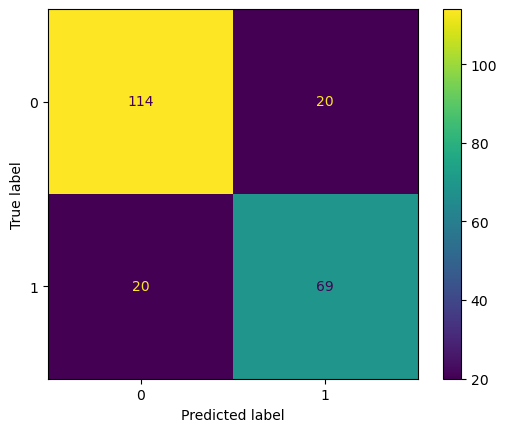

In [35]:
# Ahora vamos a realizar una matriz de confusión.

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()



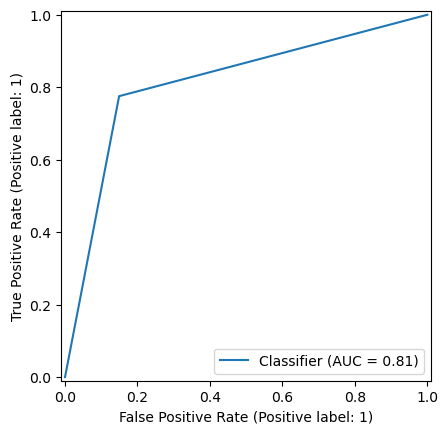

In [37]:
# Curva de precisón del modelo

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test, y_pred)
plt.show()